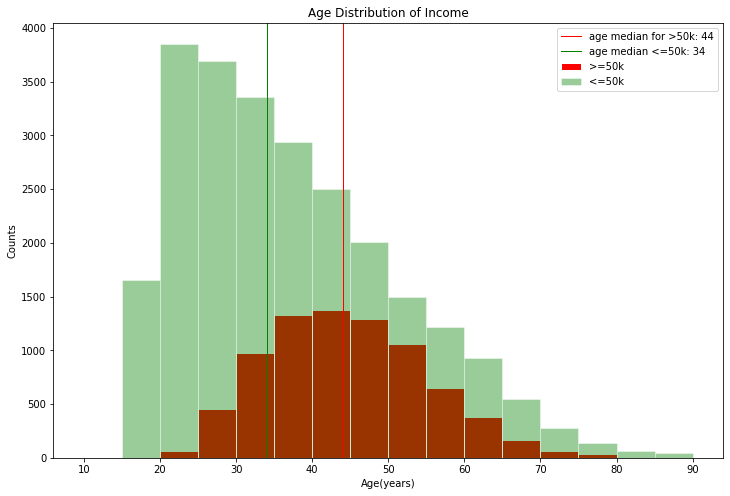

In [152]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('adult.data',
                 header=None,
                 na_values=' ?',
                 names =['age', 'workclass',
                           'fnlwgt', 'education',
                           'education-num', 'marital-status',
                           'occupation', 'relationship',
                           'race', 'sex',
                           'capital-gain', 'capital-loss',
                           'hours-per-week', 'native-country',
                          'range'])

df1 = df[['age','range']].dropna()
over_fifty_df = df1.loc[df1['range']== " >50K"]
under_fifty_df = df1.loc[df1['range']== " <=50K"]
bins = [10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90]
over_fifty = over_fifty_df['age'].tolist()
under_fifty = under_fifty_df['age'].tolist()

median_over_fifty = over_fifty_df['age'].median()
median_under_fifty = under_fifty_df['age'].median()
with plt.rc_context():
    plt.rc("figure", figsize=(12,8))
    plt.axvline(median_over_fifty,color='r',label='age median for >50k: 44', linewidth = 1)
    plt.axvline(median_under_fifty,color='g',label='age median <=50k: 34', linewidth = 1)
    plt.hist(over_fifty,bins = bins,edgecolor = 'white',color="red", alpha = 1,label=">=50k")
    plt.hist(under_fifty,bins = bins,edgecolor = 'white',color="green", alpha = 0.4, label="<=50k")
    plt.legend(loc="upper right")
    plt.title('Age Distribution of Income')
    plt.xlabel('Age(years)')
    plt.ylabel('Counts')


                      countries  counts_x  counts_y     ratio
25                         Iran        25      18.0  0.720000
30                       France        17      12.0  0.705882
14                        India        60      40.0  0.666667
23                       Taiwan        31      20.0  0.645161
20                        Japan        38      24.0  0.631579
38                   Yugoslavia        10       6.0  0.600000
35                     Cambodia        12       7.0  0.583333
17                        Italy        48      25.0  0.520833
13                      England        60      30.0  0.500000
6                        Canada        82      39.0  0.475610
5                       Germany        93      44.0  0.473118
2                   Philippines       137      61.0  0.445255
34                         Hong        14       6.0  0.428571
27                       Greece        21       8.0  0.380952
16                        China        55      20.0  0.363636
8       

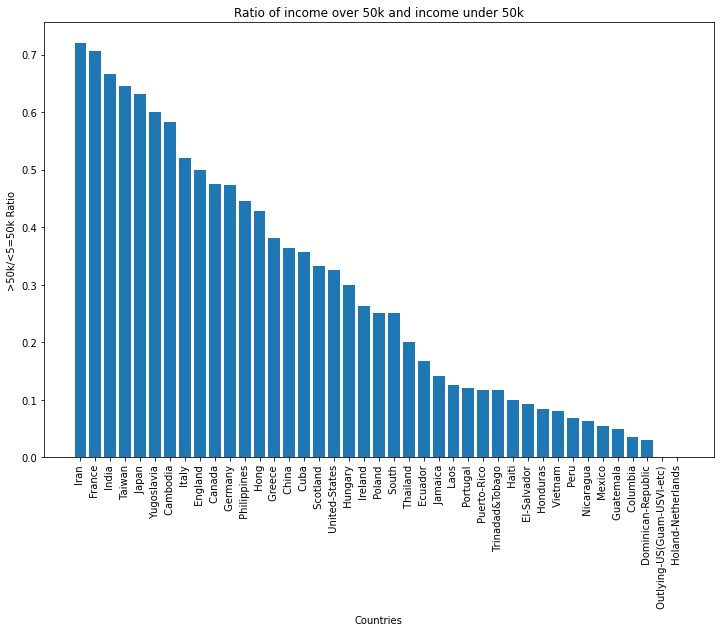

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('adult.data',
                 header=None,
                 na_values=' ?',
                 names =['age', 'workclass',
                           'fnlwgt', 'education',
                           'education-num', 'marital-status',
                           'occupation', 'relationship',
                           'race', 'sex',
                           'capital-gain', 'capital-loss',
                           'hours-per-week', 'native-country',
                          'range'])

df1 = df[['native-country','range']].dropna()
over_fifty_df = df1.loc[df1['range']== " >50K"]
under_fifty_df = df1.loc[df1['range']== " <=50K"]
under = under_fifty_df['native-country'].value_counts().rename_axis('countries').reset_index(name='counts')
over = over_fifty_df['native-country'].value_counts().rename_axis('countries').reset_index(name='counts')
df_merged = pd.merge(under, over, left_on=['countries'],
              right_on=['countries'],
              how='left')
Geo_income_ratio = df_merged.fillna(0)
Geo_income_ratio['ratio'] = Geo_income_ratio['counts_y']/Geo_income_ratio['counts_x']
Geo_income_ratio = Geo_income_ratio.sort_values('ratio',ascending=False)

print(Geo_income_ratio)
with plt.rc_context():
    plt.rc("figure", figsize=(12,8))
    plt.bar(Geo_income_ratio['countries'],Geo_income_ratio['ratio'])
    plt.xticks(rotation=90)
    plt.title('Ratio of income over 50k and income under 50k')
    plt.xlabel('Countries')
    plt.ylabel('>50k/<5=50k Ratio')
    plt.show()


<AxesSubplot:>

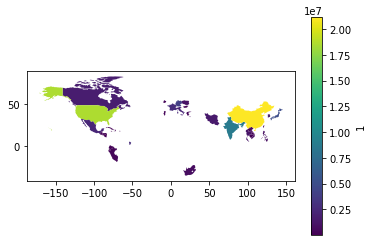

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from descartes import PolygonPatch
import geopandas as gpd

df = pd.read_csv('adult.data',
                 header=None,
                 na_values=' ?',
                 names =['age', 'workclass',
                           'fnlwgt', 'education',
                           'education-num', 'marital-status',
                           'occupation', 'relationship',
                           'race', 'sex',
                           'capital-gain', 'capital-loss',
                           'hours-per-week', 'native-country',
                          'range'])

df1 = df[['native-country','range']].dropna()
over_fifty_df = df1.loc[df1['range']== " >50K"]
under_fifty_df = df1.loc[df1['range']== " <=50K"]
under = under_fifty_df['native-country'].value_counts().rename_axis('countries').reset_index(name='counts')
over = over_fifty_df['native-country'].value_counts().rename_axis('countries').reset_index(name='counts')
df_merged = pd.merge(under, over, left_on=['countries'],
              right_on=['countries'],
              how='left')
Geo_income_ratio = df_merged.fillna(0)
Geo_income_ratio['ratio'] = Geo_income_ratio['counts_y']/Geo_income_ratio['counts_x']


world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

country = world[world["name"].str.contains("United States|Mexico|Philippines|Puerto Rico|El Salvador|Germany|Canada|Jamaica|Cuba|Dominican Republic|South|Vietnam|Guatemala|United Kindom|India|Columbia|China|Italy|Poland|Haiti|Japan|Portugal|Nicaragua|Taiwan|Peru|Iran|Ecuador|Greece|Ireland|Trinadad Tobago|France|Laos|Thailand|Hong|Guam USVI etc|Honduras|Cambodia|Yugoslavia|Hungary|Scotland|Holand Netherlands", na=False)]

# print(len(country.index))
# countries_name = ""
# for i in df_merged['countries'].tolist():
#     countries_name += i +"|"
# print(countries_name)

country.plot(column='gdp_md_est', legend=True,legend_kwds={'label': "1"})

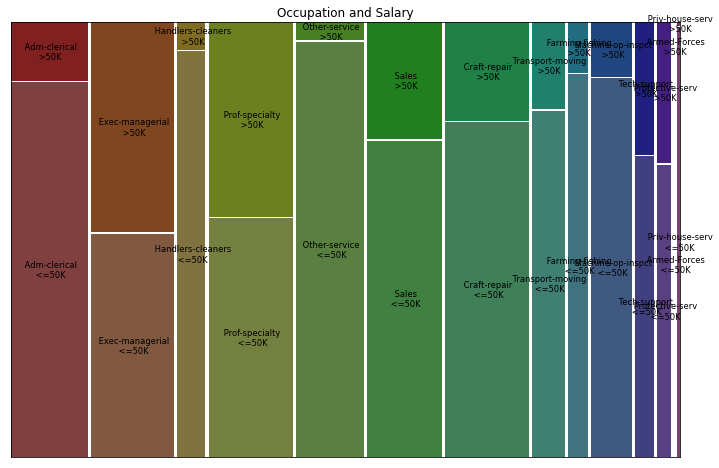

In [164]:
import pandas as pd
import matplotlib.pyplot as plt
from zx import mosaic

df = pd.read_csv('adult.data',
                 header=None,
                 na_values=' ?',
                 names =['age', 'workclass',
                           'fnlwgt', 'education',
                           'education-num', 'marital-status',
                           'occupation', 'relationship',
                           'race', 'sex',
                           'capital-gain', 'capital-loss',
                           'hours-per-week', 'native-country',
                          'range'])

df1 = df[['occupation','range']].dropna()

with plt.rc_context():
    plt.rc("figure", figsize=(12,8))
    mosaic(df1,['occupation','range'],axes_label=False,title="Occupation and Salary")


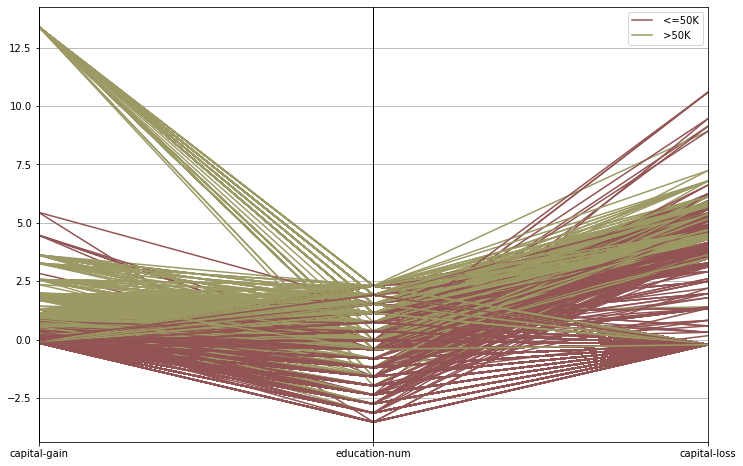

In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('adult.data',
                 header=None,
                 na_values=' ?',
                 names =['age', 'workclass',
                           'fnlwgt', 'education',
                           'education-num', 'marital-status',
                           'occupation', 'relationship',
                           'race', 'sex',
                           'capital-gain', 'capital-loss',
                           'hours-per-week', 'native-country',
                          'range'])

df1 = df[['capital-gain','education-num','capital-loss','range']].dropna()
df1.iloc[:,0:-1] = df1.iloc[:,0:-1].apply(lambda x: (x-x.mean())/ x.std(), axis=0)
df1

with plt.rc_context():
    plt.rc("figure", figsize=(12,8))
    pd.plotting.parallel_coordinates(df1,'range',color=('#915353','#9c9a64'))

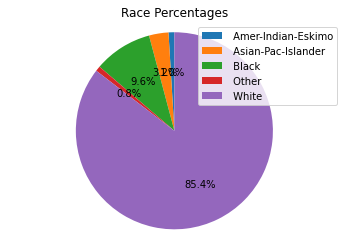

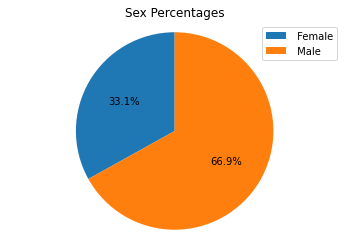

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('adult.data',
                 header=None,
                 na_values=' ?',
                 names =['age', 'workclass',
                           'fnlwgt', 'education',
                           'education-num', 'marital-status',
                           'occupation', 'relationship',
                           'race', 'sex',
                           'capital-gain', 'capital-loss',
                           'hours-per-week', 'native-country',
                          'range'])

df1 = df[['race','sex']].dropna()

race_df = df1.groupby('race').size().reset_index(name = "counts")
sex_df = df1.groupby('sex').size().reset_index(name = "counts")
race_df

with plt.rc_context():

    pie = plt.pie(race_df['counts'],autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.legend( loc = 'upper right', labels=race_df['race'])
    plt.title("Race Percentages")
    plt.show()
with plt.rc_context():

    pie = plt.pie(sex_df['counts'],autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.legend( loc = 'upper right', labels=sex_df['sex'])
    plt.title("Sex Percentages")
    plt.show()

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# df = pd.read_csv('adult.data',
#                  header=None,
#                  na_values=' ?',
#                  names =['age', 'workclass',
#                            'fnlwgt', 'education',
#                            'education-num', 'marital-status',
#                            'occupation', 'relationship',
#                            'race', 'sex',
#                            'capital-gain', 'capital-loss',
#                            'hours-per-week', 'native-country',
#                           'range'])

# df1 = df[['hours-per-week','range']].dropna()
# income_df = df1.groupby('hours-per-week').size().reset_index(name = "counts")
# # plt.boxplot(df1['hours-per-week'])
# Fixing random state for reproducibility
np.random.seed(19680801)

# fake up some data
spread = np.random.rand(50) * 100
center = np.ones(25) * 50
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
data = np.concatenate((spread, center, flier_high, flier_low))
data
# fig1, ax1 = plt.subplots()
# ax1.set_title('Basic Plot')
# ax1.boxplot(data)

array([ 70.03673039,  74.27508094,  70.92800107,  56.67455225,
        97.77853328,  70.6334846 ,  24.79157587,  15.78833509,
        69.76985214,  71.99566667,  25.77444303,  34.15467831,
        96.87611677,  69.45070978,  46.63832593,  70.28126954,
        51.1785874 ,  92.874137  ,  73.97692989,  62.24390337,
        65.15454689,  39.68076115,  54.32393949,  79.98995282,
        72.15447266,  29.53639811,  16.09458806,  20.61255148,
        13.43253868,  48.06050174,  34.25218134,  36.29692901,
        97.29176387,  11.09436116,  38.82640891,  78.30658753,
        97.28972601,  48.32096053,  33.64211054,  56.74190362,
         4.79415097,  38.8937029 ,  90.63036451,  16.10182093,
        74.36211347,  63.29741618,  32.41800177,  92.23765324,
        23.72264387,  82.39455709,  50.        ,  50.        ,
        50.        ,  50.        ,  50.        ,  50.        ,
        50.        ,  50.        ,  50.        ,  50.        ,
        50.        ,  50.        ,  50.        ,  50.  